In [1]:
!pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Saving data1.csv to data1.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:

df.head(5)



,site,record,q1,q2,q3,q4,q5,q6,q10,q15,...,qnnotb2g,qnbcanyg,qnc1g,qnpa5g,qnpa7g,qnpe3g,qnpe5g,weight,stratum,psu
0,AG,1,3.0,2.0,2.0,NaN,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,1.0,1.0,2.0,2.0,457.0940,201801010,19
1,AG,2,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,2.0,2.0,2.0,457.0940,201801010,19
2,AG,3,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,2.0,2.0,2.0,261.4465,201801010,19
3,AG,4,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,550.9036,201801010,19
4,AG,5,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,2.0,2.0,2.0,2.0,457.0940,201801010,19


In [5]:
#Dataframe of features
df2 = pd.DataFrame({}, index=np.arange(56981))

#Features
df2["q3"] = df["q3"]
df2["q15"] = df["q15"]
df2["q16"] = df["q16"]
df2["q22"] = df["q22"]
df2["q23"] = df["q23"]
df2["q24"] = df["q24"]
df2["q25"] = df["q25"]
df2["q26"] = df["q26"]
df2["q27"] = df["q27"]
df2["q54"] = df["q54"]
df2["q56"] = df["q56"]


#Response variables
df2["q66"] = df["q66"] #in school bully
df2["q67"] = df["q67"] #outside school bully
df2["q68"] = df["q68"] # cyber bully


#Cleaned NaN entries
df2.dropna(inplace= True)

#Made new data frame for the response variable
df3 = pd.DataFrame({}, index=np.arange(56981))


df3["q66"] = df2["q66"]
df3.dropna(inplace= True)
df2.head(20)

,q3,q15,q16,q22,q23,q24,q25,q26,q27,q54,q56,q66,q67,q68
1,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,5.0,2.0,2.0,2.0
4,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,4.0,4.0,2.0,2.0,2.0
5,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,2.0,2.0
6,4.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,2.0,2.0
7,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0
8,4.0,2.0,3.0,1.0,4.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0
9,2.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0
10,2.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,2.0,2.0
11,4.0,8.0,2.0,3.0,5.0,1.0,1.0,2.0,4.0,1.0,5.0,1.0,1.0,1.0
12,2.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0


In [6]:


df3.head(20)

,q66
1,2.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,1.0
10,2.0
11,1.0
12,2.0


In [7]:
#Dropped response variables from matrix with features
df2.drop(columns=['q66', 'q67', 'q68'], inplace=True)
df2

,q3,q15,q16,q22,q23,q24,q25,q26,q27,q54,q56
1,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,3.0,5.0
4,2.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,4.0,4.0
5,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0
6,4.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,4.0,4.0,5.0
7,4.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56975,5.0,8.0,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,3.0
56976,5.0,1.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0
56977,5.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,3.0,1.0
56979,5.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,3.0,4.0,2.0


### **Where I tested for Correlation between Features**

In [8]:
df3.corrwith(df2.q3)

q66    0.045225
dtype: float64

In [9]:
df3.corrwith(df2.q15)

q66   -0.160565
dtype: float64

In [10]:
df3.corrwith(df2.q16)

q66   -0.049107
dtype: float64

In [11]:
df3.corrwith(df2.q22)

q66   -0.206041
dtype: float64

In [12]:
df3.corrwith(df2.q24)

q66    0.185886
dtype: float64

In [13]:
df3.corrwith(df2.q25)

q66    0.165326
dtype: float64

In [14]:
df3.corrwith(df2.q26)

q66   -0.144176
dtype: float64

In [15]:
df3.corrwith(df2.q27)

q66    0.065903
dtype: float64

In [16]:
df3.corrwith(df2.q54)

q66    0.128793
dtype: float64

In [17]:
df3.corrwith(df2.q56)

q66    0.069992
dtype: float64

**On School bullying**

In [18]:

X_train, X_test, y_train, y_test = train_test_split(df2, df3, test_size=0.3)



MultinomialNB()
0.7941216034436374


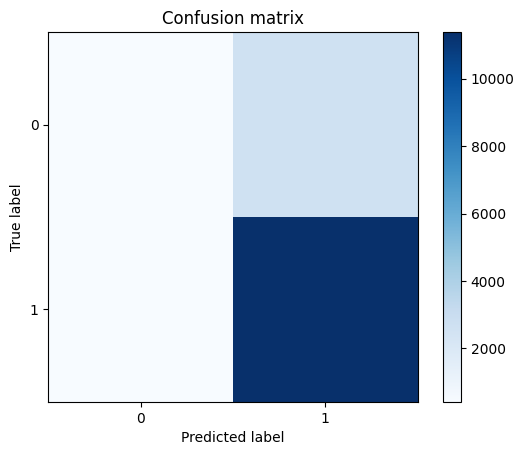

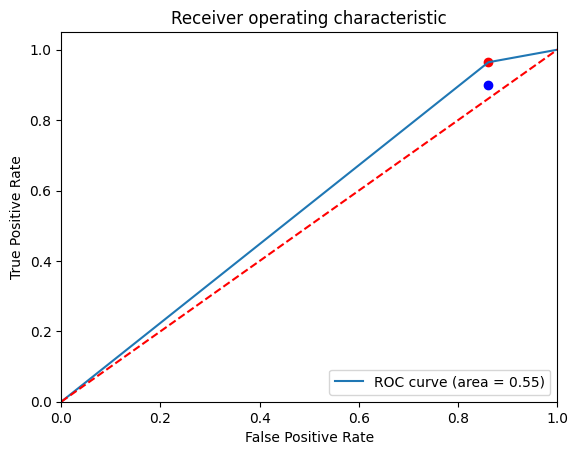

In [27]:


NB = MultinomialNB()
NB.fit(X_train, y_train.values.ravel())
print (NB)

y_expect = y_test
y_pred = NB.predict(X_test)
print (accuracy_score(y_expect, y_pred))
cm = metrics.confusion_matrix(y_expect, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()

GaussianNB()
0.7567258541834813


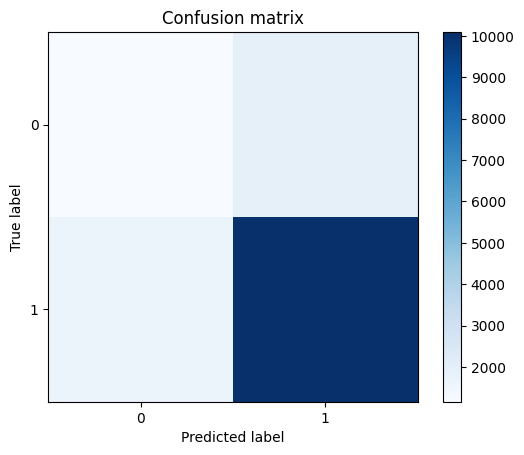

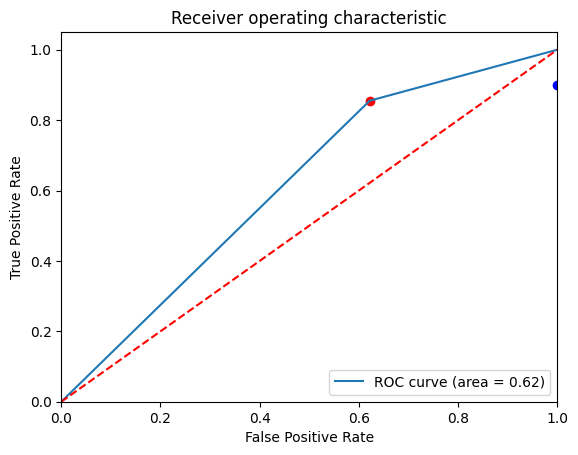

In [28]:

NB2 = GaussianNB()
NB2.fit(X_train, y_train.values.ravel())
print (NB2)

y_expect = y_test
y_pred = NB2.predict(X_test)
print (accuracy_score(y_expect, y_pred))
cm = metrics.confusion_matrix(y_expect, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()

OutSide school bully

In [21]:
df2 = pd.DataFrame({}, index=np.arange(56981))

#Features
df2["q3"] = df["q3"]
df2["q15"] = df["q15"]
df2["q16"] = df["q16"]
df2["q22"] = df["q22"]
df2["q23"] = df["q23"]
df2["q24"] = df["q24"]
df2["q25"] = df["q25"]
df2["q26"] = df["q26"]
df2["q27"] = df["q27"]
df2["q54"] = df["q54"]
df2["q56"] = df["q56"]


#Response variables
df2["q66"] = df["q66"] # in school bully
df2["q67"] = df["q67"] # outside school bully
df2["q68"] = df["q68"] # cyber bully


#Cleaned NaN entries
df2.dropna(inplace= True)

#Made new data frame for the response variable
df3 = pd.DataFrame({}, index=np.arange(56981))


df3["q67"] = df2["q67"]
df3.dropna(inplace= True)
df2.drop(columns=['q66', 'q67', 'q68'], inplace=True)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df2, df3, test_size=0.3)

NB = MultinomialNB()
NB.fit(X_train, y_train.values.ravel())
print (NB)

y_expect = y_test
y_pred = NB.predict(X_test)
print (accuracy_score(y_expect, y_pred))
cm = metrics.confusion_matrix(y_expect, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()

NB2 = GaussianNB()
NB2.fit(X_train, y_train.values.ravel())
print (NB2)

y_expect = y_test
y_pred = NB2.predict(X_test)
print (accuracy_score(y_expect, y_pred))
cm = metrics.confusion_matrix(y_expect, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()


MultinomialNB()
0.7969464622006995
GaussianNB()
0.7498654829163304


**Cyber bully**




MultinomialNB()
0.7941216034436374


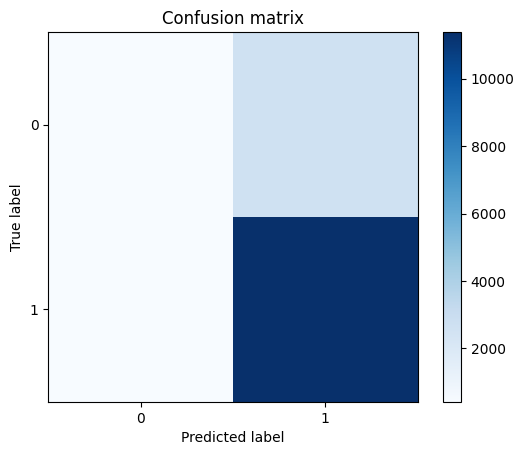

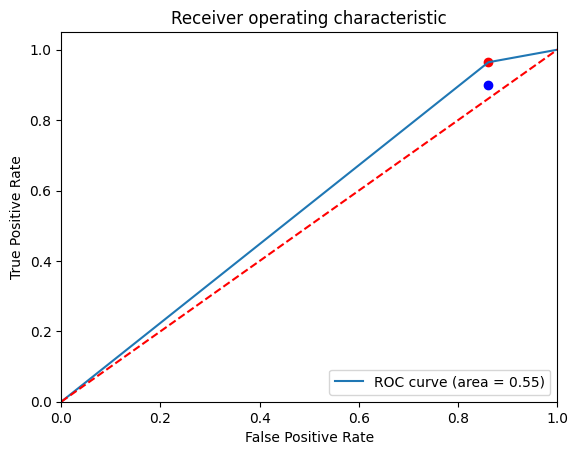

GaussianNB()
0.7567258541834813


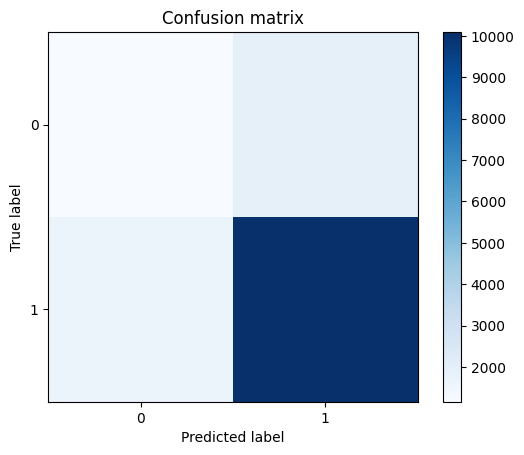

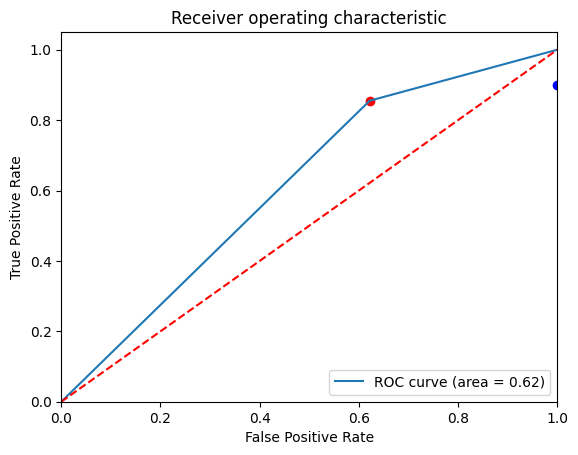

In [26]:
df2 = pd.DataFrame({}, index=np.arange(56981))

#Features
df2["q3"] = df["q3"]
df2["q15"] = df["q15"]
df2["q16"] = df["q16"]
df2["q22"] = df["q22"]
df2["q23"] = df["q23"]
df2["q24"] = df["q24"]
df2["q25"] = df["q25"]
df2["q26"] = df["q26"]
df2["q27"] = df["q27"]
df2["q54"] = df["q54"]
df2["q56"] = df["q56"]


#Response variables
df2["q66"] = df["q66"] # in school bully
df2["q67"] = df["q67"] # outside school bully
df2["q68"] = df["q68"] # cyber bully


#Cleaned NaN entries
df2.dropna(inplace= True)

#Made new data frame for the response variable
df3 = pd.DataFrame({}, index=np.arange(56981))


df3["q68"] = df2["q68"]
df3.dropna(inplace= True)
df2.drop(columns=['q66', 'q67', 'q68'], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(df2, df3, test_size=0.3)

NB = MultinomialNB()
NB.fit(X_train, y_train.values.ravel())
print (NB)

y_expect = y_test
y_pred = NB.predict(X_test)
print (accuracy_score(y_expect, y_pred))
cm = metrics.confusion_matrix(y_expect, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()



NB2 = GaussianNB()
NB2.fit(X_train, y_train.values.ravel())
print (NB2)

y_expect = y_test
y_pred = NB2.predict(X_test)
print (accuracy_score(y_expect, y_pred))

cm = metrics.confusion_matrix(y_expect, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')

pos_label = 2.0

# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_expect, y_pred, pos_label=pos_label)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Add labels based on pos_label
plt.scatter(fpr[1], tpr[1], color='red', label='Threshold=1.0')
plt.scatter(fpr[np.argmax(tpr >= 0.9)], 0.9, color='blue', label='Threshold=0.9')

plt.show()



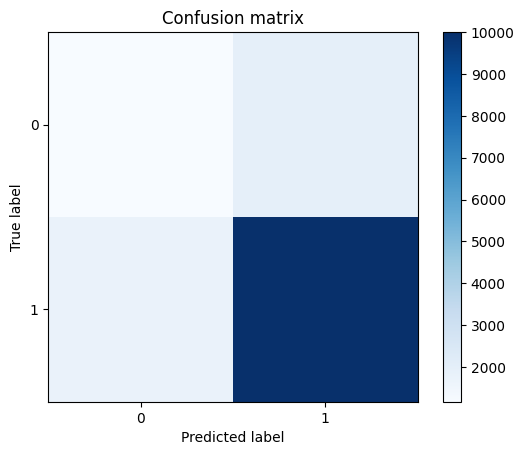

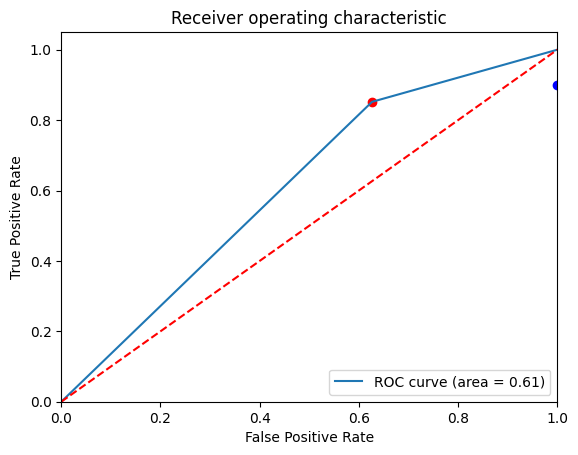

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics

# After model training and predictions

# Confusion matrix